# <b>Convolutional Neural Networks (CNNs)</b>
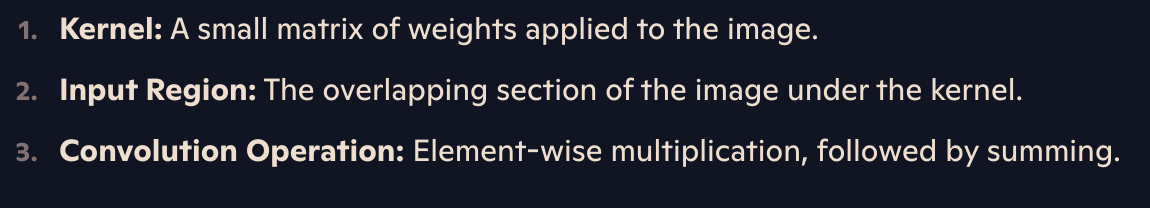
In mathematics, convolution refers to combining two functions (or arrays) in a systematic way. In image processing, we "combine" an image and a kernel through sliding and element-wise multiplication, which closely mirrors the mathematical definition.
$$g(x, y) = (f * k)(x, y) = \sum_{i=-m}^{m} \sum_{j=-n}^{n} f(x+i, y+j) \cdot k(i, j)$$
- Where:

    1. 𝑥 and 𝑦: These are the coordinates of a specific pixel in the output feature map.
    
    2. 𝑖 and 𝑗: These are the <b>relative coordinates </b>within the kernel.
        - Indicate the offset of a kernel weight 𝑘(𝑖,𝑗) from the kernel's center position during the convolution process
    
    3. m and n: define the size (or "radius") of the kernel in each dimension
        - m: # of rows in the kernel, divided by 2 (e.g., for 3x3 kernel, m=1)

        - n: # of columns in the kernel, divided by 2 (e.g., for a 3x3 kernel, n=1 )

    4. 𝑓(𝑥,𝑦): The <b>input image</b>, represented as a 2D grid of pixel values.
        - Each pixel value 𝑓(𝑥,𝑦) corresponds to the intensity of the image at the position (𝑥,𝑦)

    5. 𝑘(𝑖,𝑗): The kernel/filter, represented as a small 2D matrix of weights
        - Each 𝑘(𝑖,𝑗) defines the weight applied to the corresponding pixel in the input image's neighborhood during the convolution process.
        - The size of the kernel is typically small, such as 3x3 or 5x5

    6. 𝑔(𝑥,𝑦): The convolved image (or feature map).
        - This is the <b>output value</b> at the position (𝑥,𝑦) in the resulting feature map/convolved image
        - Represents the result of applying the kernel 𝑘 to the input image 𝑓 at the specific position (𝑥,𝑦)
    
    7. <i><b>*</b></i>: This represents the convolution operation, which involves sliding the kernel across the input image, performing element-wise multiplication and summation at each position.

This formula represents how each value in the output is computed by combining the image's pixel values and the kernel's weights.

Example:
![Screenshot 2025-03-20 at 21.35.09.png](<attachment:Screenshot 2025-03-20 at 21.35.09.png>)
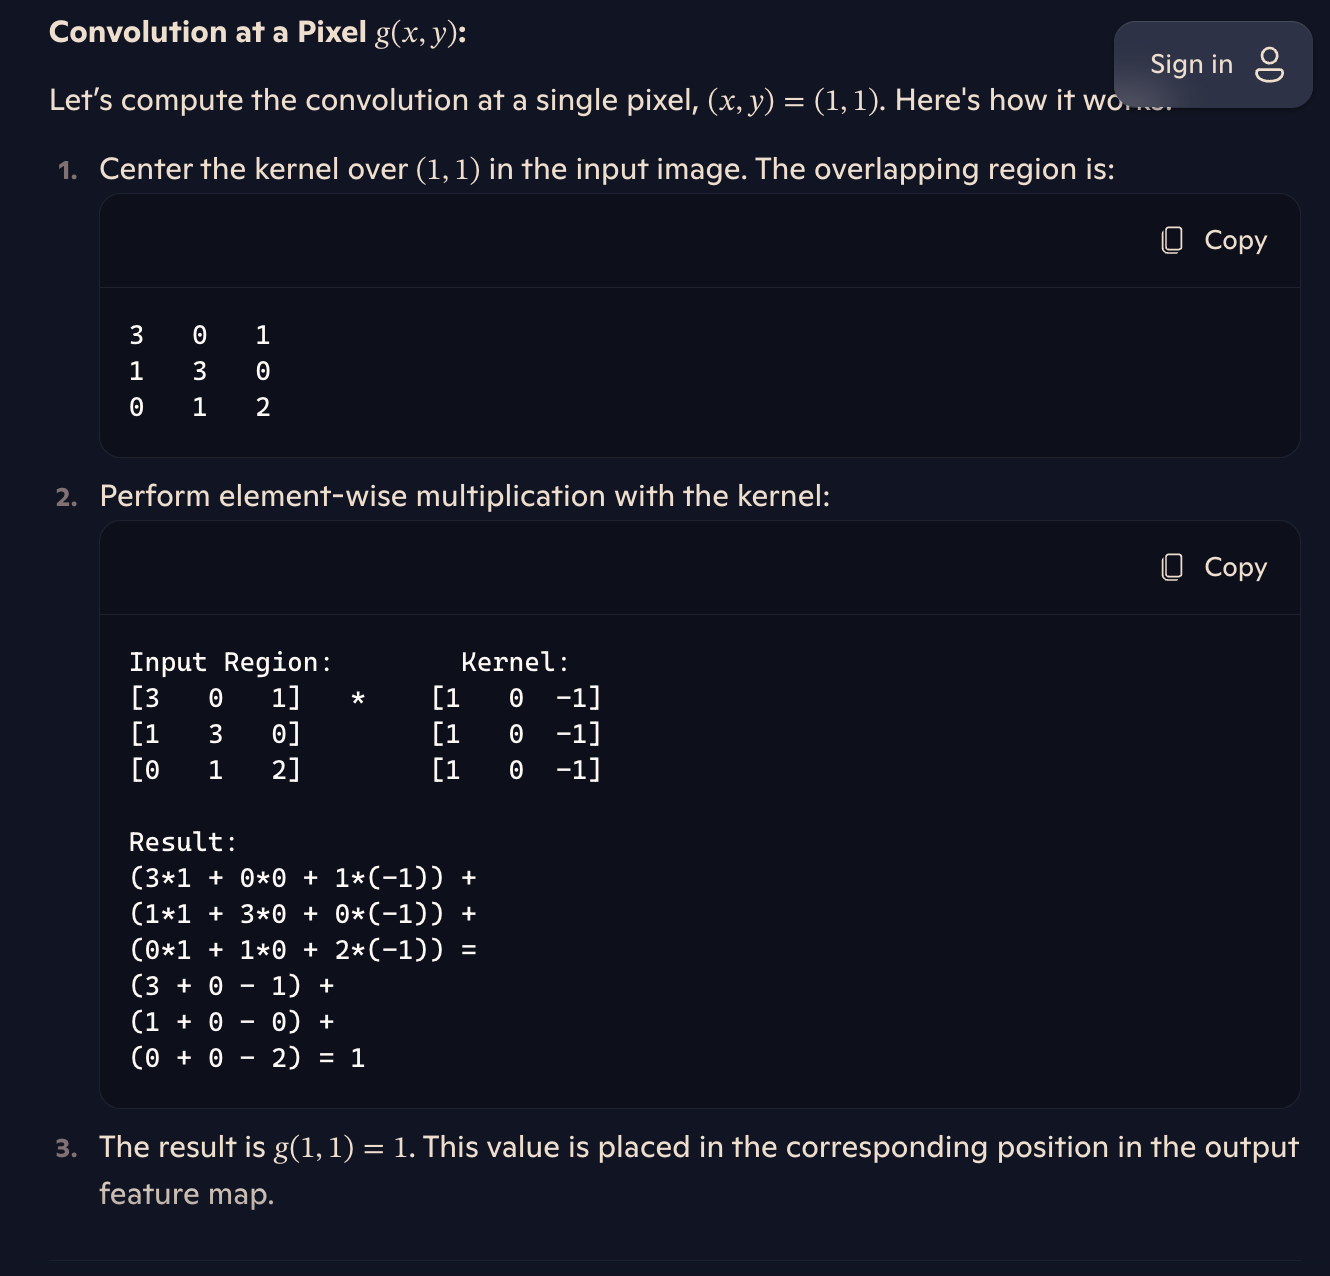
***
Use Case: Image and video data (e.g., image classification, object detection, facial recognition, medical image analysis).

Why Used: CNNs excel at capturing spatial patterns and hierarchies in image data using convolutional layers.
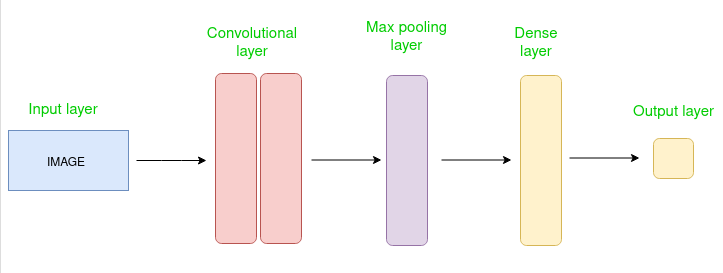

Convolution Neural Networks or covnets are neural networks that share their parameters. Imagine you have an image. It can be represented as a cuboid having its length, width (dimension of the image), and height (i.e the channel as images generally have red, green, and blue channels). 

-> Note, an image, essentially, is a 3d array
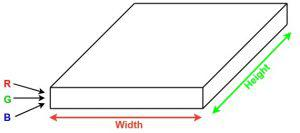

- Further
    - The heart of CNN is <b>2D convolution operation</b> -- a mathematical process used in image processing and computer vision to extract features from 2D data, such as images.


***
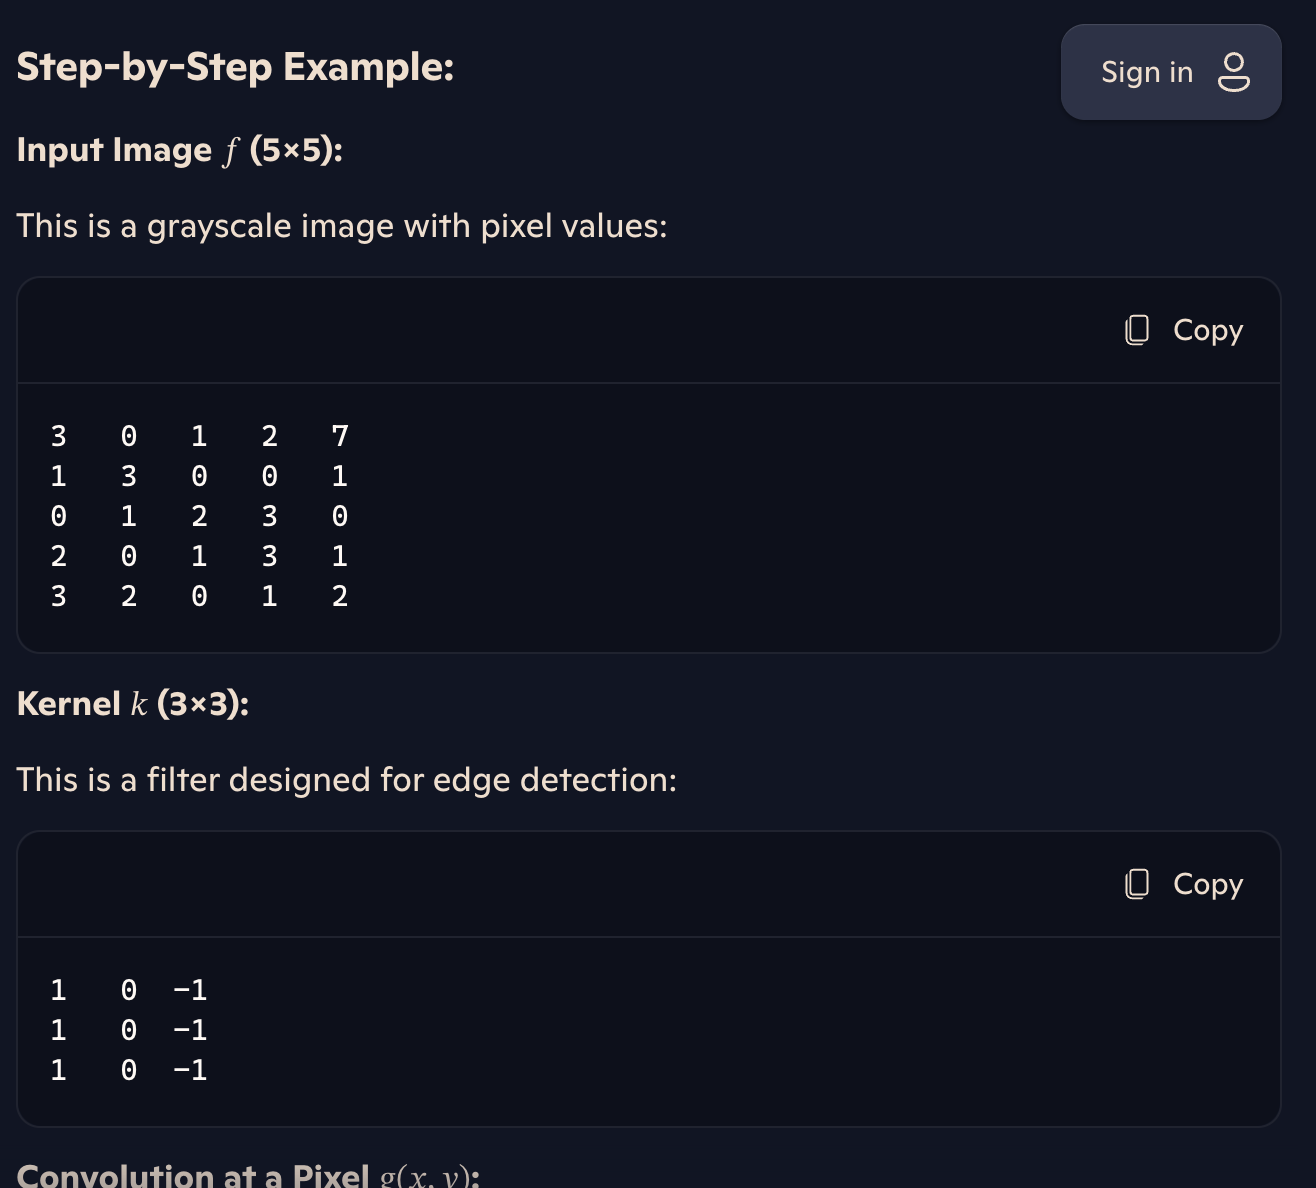

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

***
1. <code>plt.rc()</code>
    - set/ modify the <b>runtime configuration parameters</b> i.e. the appearance and behavior of the plots globally (for all figures and axes), instead of being set individually for each plot

2. <code>plt.rc('figure',autolayout=True)</code>
    - modifies the configuration for the 'figure' category

    - <code>autolayout=True</code>:
        - Automatically adjusts the layout of the plots to prevent overlapping elements (e.g., axis labels, titles, tick labels, etc.).

3. <code>plt.rc('image', cmap='magma')</code>
    - This modifies the configuration for the 'image' category

    - <code>cmap='magma'</code>
        - Sets the default colormap for visualizing image data (e.g., heatmaps or 2D arrays) to 'magma'

        - 'magma' is a perceptually uniform colormap, meaning it is visually effective for representing data differences because it doesn't distort color intensity perception.
***    

In [2]:
#set the param
plt.rc('figure',autolayout=True)
plt.rc('image', cmap='magma')

***
- Kernel
    - In image processing and computer vision, <b>a kernel is a small matrix used to perform operations like convolution on an image. Kernels are used for tasks like edge detection, sharpening, blurring, etc.</b>

    - The defined kernel is a 3x3 matrix, which will be applied to an image through a convolution operation.

- Kernel definition
    - <code>tf.constant:</code> This creates a constant tensor in TensorFlow. The kernel values are fixed and will not change during the operation.


    - Values in the Kernel:
        - The center value (8) has a high weight, while all surrounding values are -1.

        - The pattern suggests this kernel is designed for edge detection or highlighting differences in pixel intensities.

    - Note:
        - High Weight: serve to highlight features, such as the current pixel's intensity, edges, or significant patterns.

        - Low Weight: compare neighboring pixel values and detect changes or contrasts (e.g., edges or boundaries).
***

In [3]:
#define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

***
- <code>image = tf.io.decode_jpeg(image, channels=1)</code>
    - decodes the binary string into <b>a JPEG image tensor</b>
    
    - <code>channels=1</code>
        - forces the image to be converted into a grayscale image (1 channel)
        
        - if the original image was in color (RGB with 3 channels), it would now have only intensity values ranging from 0 (black) to 255 (white).
***

In [4]:
#load the image
image = tf.io.read_file('img/Ganesh.jpg')
image = tf.io.decode_jpeg(image,channels=1)
image = tf.image.resize(image, size=[300,300]) # in terms of pixels

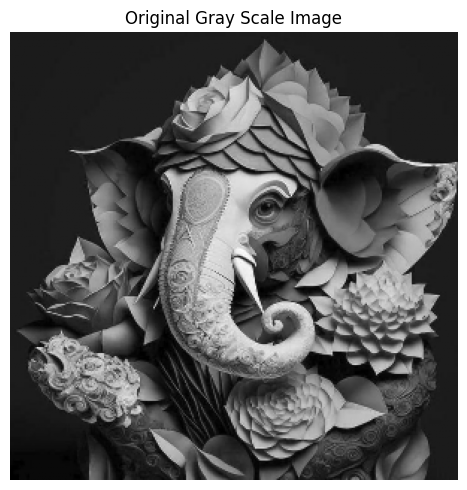

In [5]:
#plot the image
img =tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale Image')
plt.show()
 

***
- Prepare both the <code>image</code> and <code>kernel</code> for use in a <b>convolution operation</b>
    1. Normalizing and expanding the image to include a batch dimension.

    2. Reshaping and formatting the kernel to match TensorFlow’s convolution input requirements.

    3. Ensuring both tensors have compatible data types (tf.float32).

- Code analysis
    1. <code>image = tf.image.convert_image_dtype(image, dtype=tf.float32)</code>

        - Converts the pixel values of the image from their current data type (e.g., integers in the range 0-255) to the tf.float32 type (32-bit floating point).

        - By default, this also normalizes pixel values to the range [0, 1].

        - <b>Neural networks often work better with normalized data, as it ensures consistent scaling across all inputs and improves numerical stability during computations.</b>

    2. <code>image = tf.expand_dims(image, axis=0)</code>

        - Adds an extra dimension to the image tensor at axis=0.

        - For example:

            - Before: The image had a shape of [300, 300, 1] (grayscale 2D image).

            - After: The shape becomes [1, 300, 300, 1], where the 1 represents the batch size
        
        - <b>TensorFlow models and convolution operations expect inputs to include a batch dimension, even if there's only one image (batch size of 1). Adding this dimension ensures compatibility with such models.</b>

    3. <code>kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])</code>

        - Reshapes the kernel tensor by expanding it to include two additional dimensions:

            - <code>[kernel_height, kernel_width]</code> becomes <code>[kernel_height, kernel_width, 1, 1]</code>.

        - For example:

            - Before: If kernel was [3, 3] (a 2D kernel).

            - After: It becomes [3, 3, 1, 1], where:

                - The first 1 refers to the input channels (e.g., 1 for grayscale).

                - The second 1 refers to the number of output filters (e.g., applying 1 filter).

            - <b>Note: </b>Convolutional operations in TensorFlow require the kernel to have 4 dimensions:

                - [kernel_height, kernel_width, input_channels, output_channels].

            - Adding these dimensions ensures the kernel is formatted correctly for processing images.

    4. <code>kernel = tf.cast(kernel, dtype=tf.float32)</code>
        - Converts the kernel tensor to the <code>tf.float32</code> data type (32-bit floating point).

        - The kernel must have the same data type as the image (also converted to <code>tf.float32</code> earlier). <b>TensorFlow operations require matching types for compatibility</b>.
***

In [6]:
# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

***
1. <code>conv_fn = tf.nn.conv2d</code>
    - performs a 2D convolution operation by applying a filter/kernel to an input image and outputs a transformed image.

2. <code>image_filter = conv_fn(...)</code>
    - Apply the convolution operation with the following provided parameter
        
        - <code>input=image</code>
            - Specifies the input tensor, which represents the image
            - Before reaching this point, the image tensor has been prepared with the necessary dimensions:
                - Shape: [batch_size, height, width, channels].
                - In this case:
                    - <code>batch_size=1</code> (a single image)
                    - <code>height=300</code> and <code>width=300</code> (resized dimensions)
                    - <code>channels=1</code> (grayscale image)

        - <code>filters=kernel</code>
            - Specifies the kernel (filter) tensor to be applied to the image.
            - The kernel was earlier reshaped to have the required shape:
                - Shape: <code>[kernel_height, kernel_width, input_channels, output_channels].</code>
            - For example, if the kernel's shape is <code>[3, 3, 1, 1]</code>:
                - <code>kernel_height=3</code> and <code>kernel_width=3</code> (a 3x3 filter).
                - <code>input_channels=1</code> (for grayscale images).
                - <code>output_channels=1</code> (only one filter applied in this case)
        
        - <code>strides=1</code>
            - Specifies the step size (stride) for the convolution.
            - Stride of 1 means the kernel moves one pixel at a time <b>horizontally and vertically</b> across the image. This ensures maximum coverage of the input image.
            - Equivalent to <code>[1,1,1,1]</code>
                - The two <b>outer 1s</b> are for batch and channel dimensions, which are fixed.
                - The two <b>inner 1s</b> represent the vertical and horizontal stride, respectively.

        - <code>padding='SAME'</code>
            - Determines how the image edges are handled during convolution.
            - <code>'SAME'</code> Padding:
                - Adds padding around the image to ensure the output has the same same height and width as the input
                - For example, with a stride of 1 and a 3x3 kernel, the input shape of <code>[300,300,1]</code> will produce an output of shape <code>[300,300,1]</code>
***

In [7]:
# Convolution layer
conv_fn = tf.nn.conv2d

"""
image_filter stores the output of the convolution
the output is a transformed image tensor, where:
    Shape: [kernel_height, kernel_width, input_channels, output_channels]
    example might be [1,300,300,1]
    
Each pixel in image_filter is the result of applying the kernel to a small neighborhood of pixels in the input image.
In this case, the kernel detects edges or highlights specific patterns based on its defined values
 """
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)

***
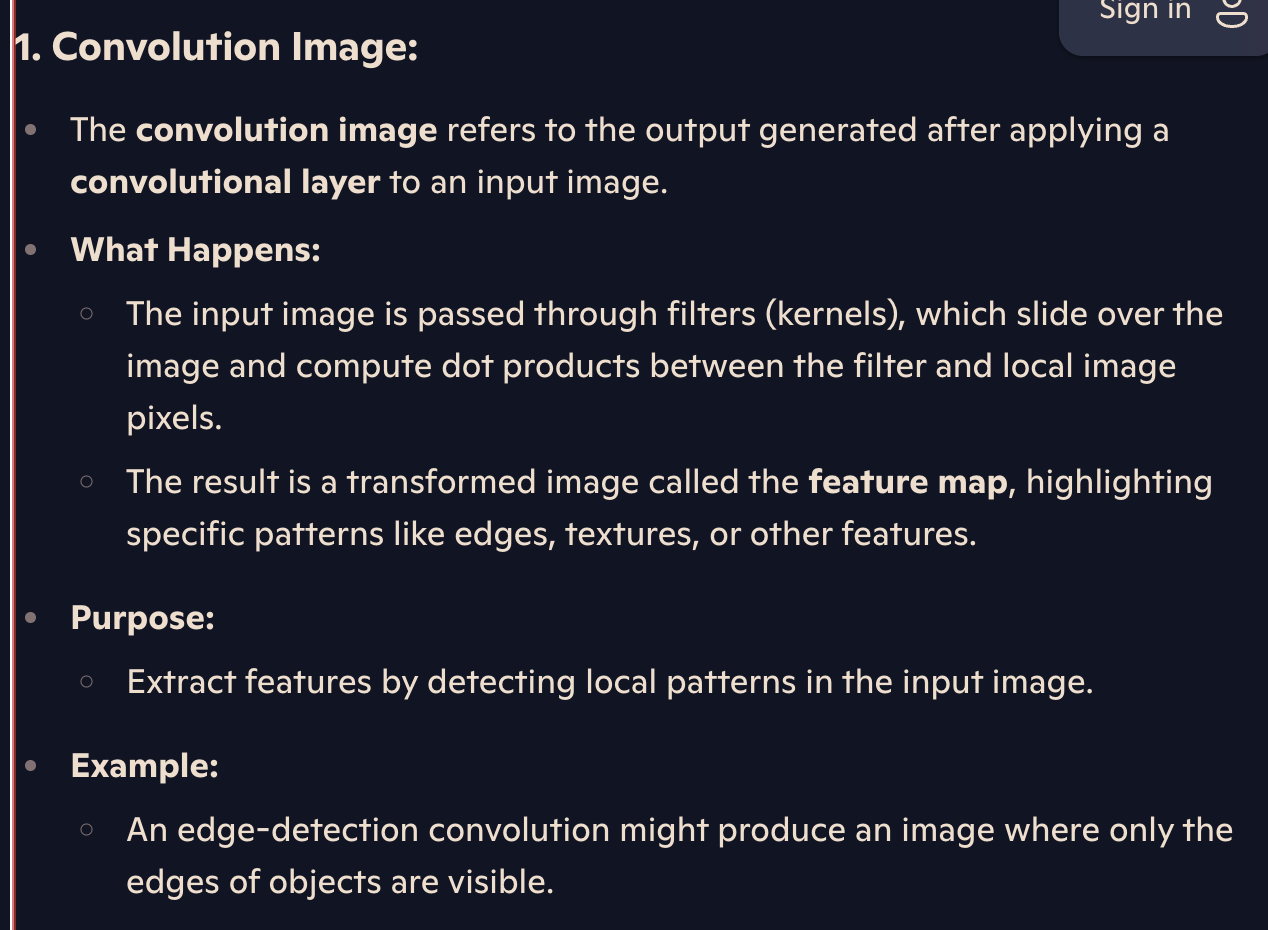

<b>Extracts features by applying filters to the input image</b>
***

Text(0.5, 1.0, 'Convolution')

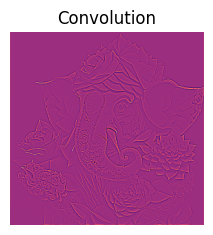

In [8]:
# Plot the convolved image
plt.subplot(1,3,1)

plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

***
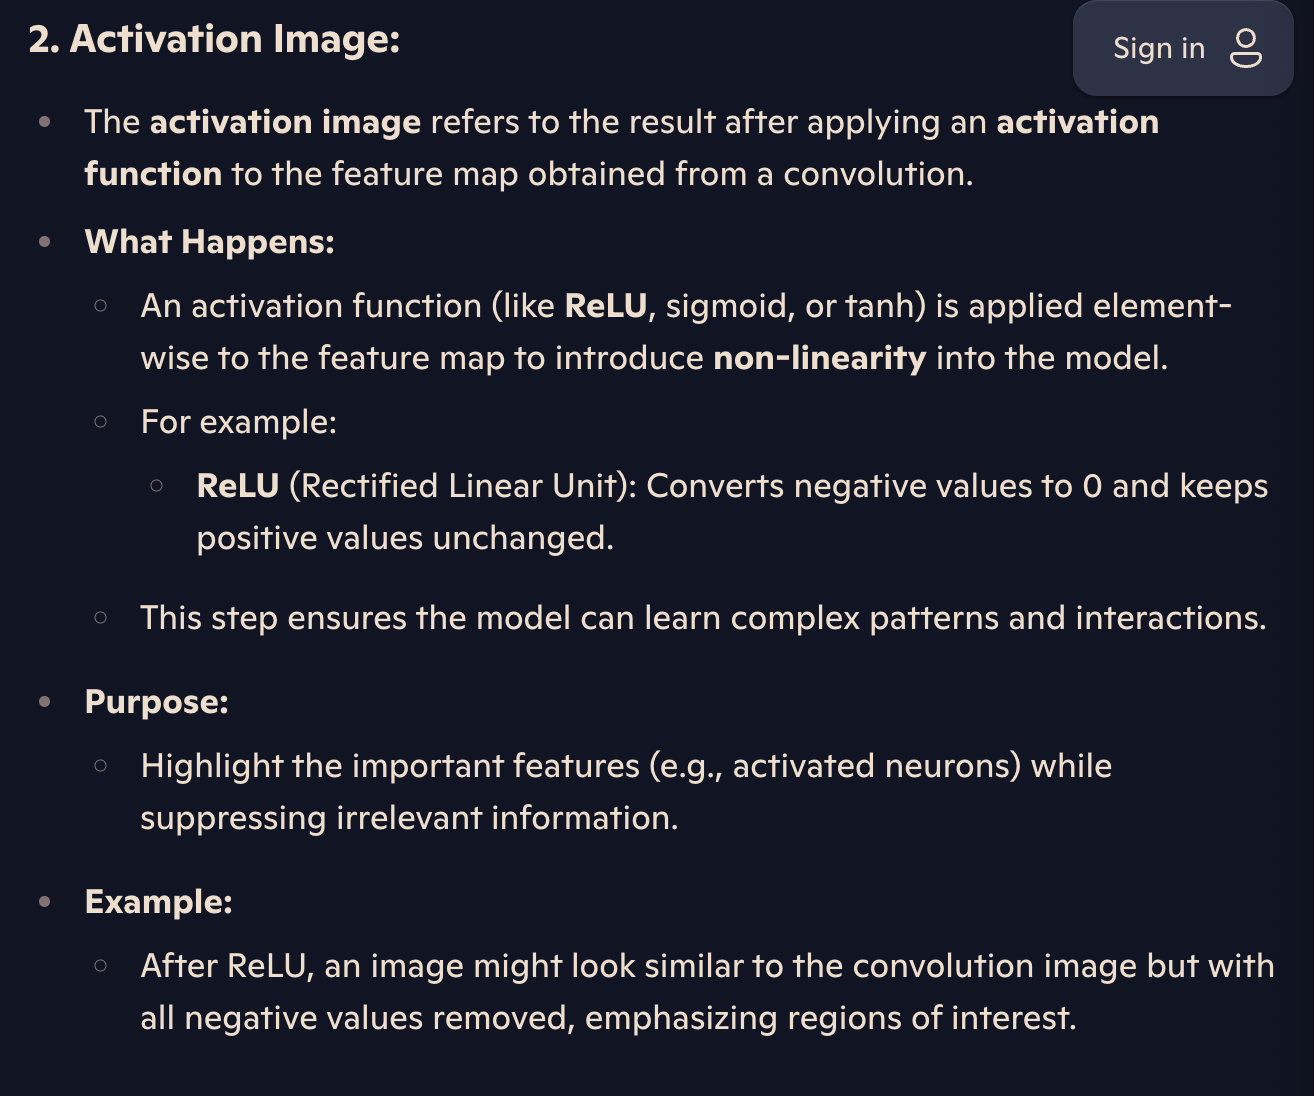

<b>Adds non-linearity to highlight relevant patterns/features.</b>
***

Text(0.5, 1.0, 'Activation')

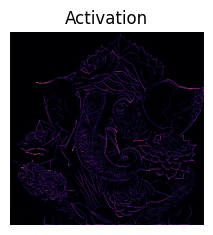

In [9]:
# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1,3,2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.title('Activation')

In [10]:
# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2,2),
    padding='SAME'
    )

***
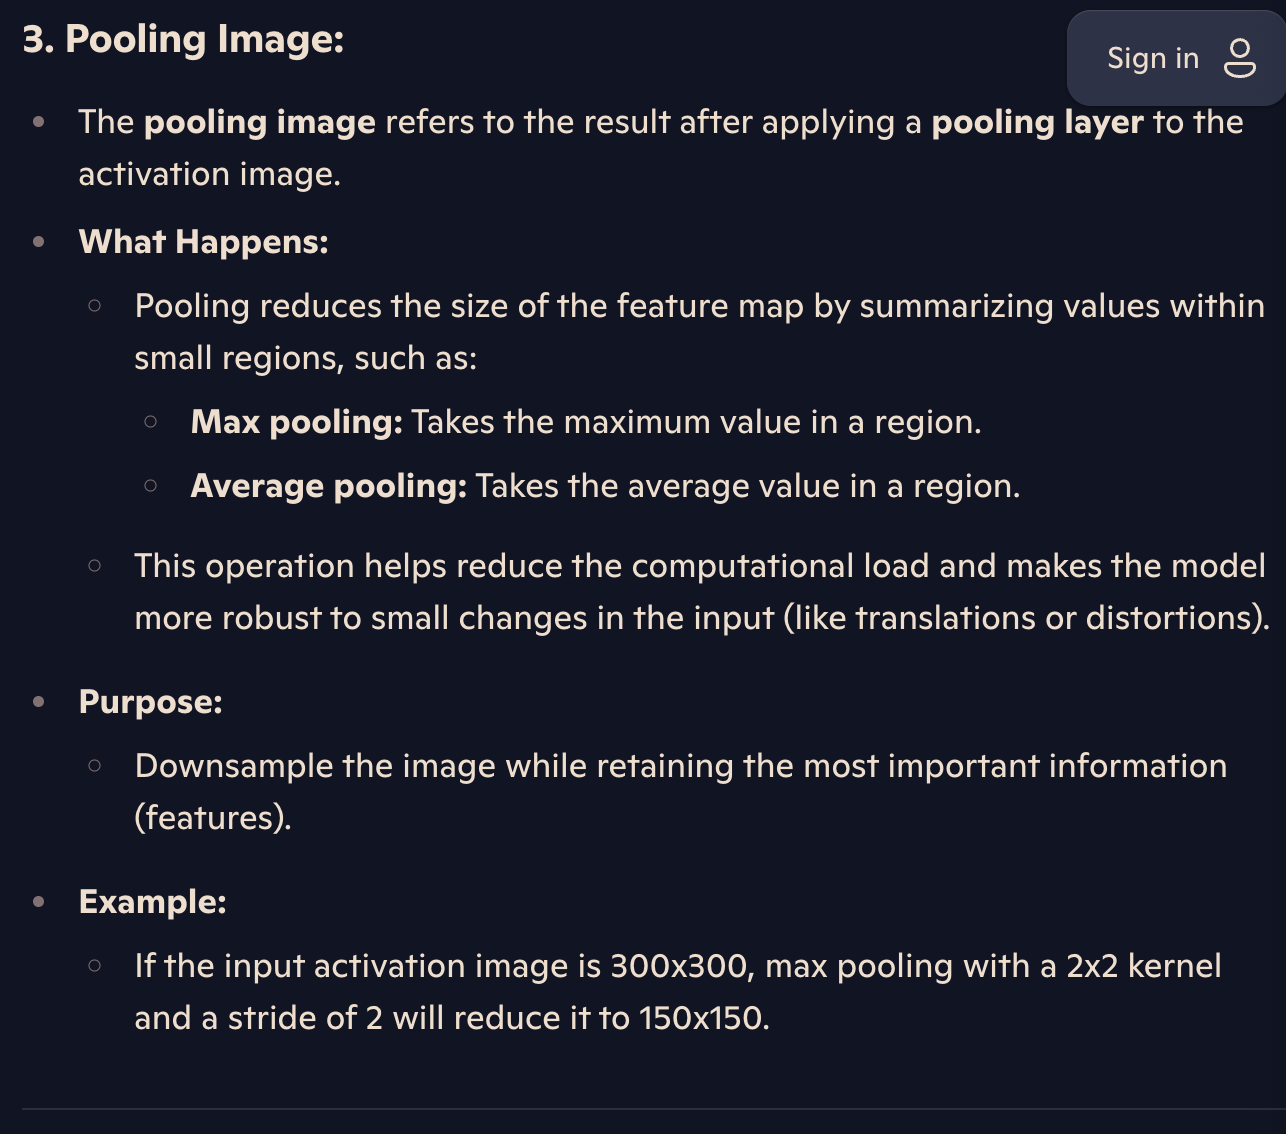
<b>Downsamples the activation image to simplify and generalize the features.</b>

    - Downsamples: reducing the resolution or sampling rate of data while still trying to preserve its essential information.
***

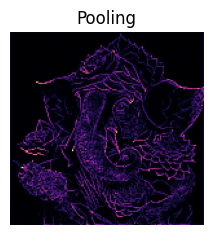

In [11]:
plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()